## Shooting movements - FF - Discover = T

In [15]:
%load_ext autoreload
%autoreload 2

from ff_environment import TargetReach
from agents.agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Create and initialize the environment
env = TargetReach(space_padding=2, discover=True)

env_info = env.reset()
env.add_forcefield((0,6))
print(env.ff_force)

(0, 6)


In [17]:
# Provide some information about the initial state and target position

action_size = env.action_size
print('Size of each action:', action_size)

# Examine the state space
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:',state)

Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]


In [18]:
# Instantiate the agent : 

agent = Agent(state_size, action_size, random_seed=2)

In [19]:
# Train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env,n_episodes=100,print_every=1000,stop=True)

Episode 0 	Average Reward: -10.01
Episode 99 	Average Reward: -10.01

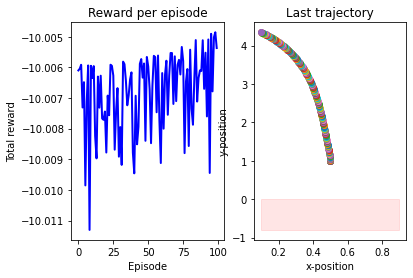

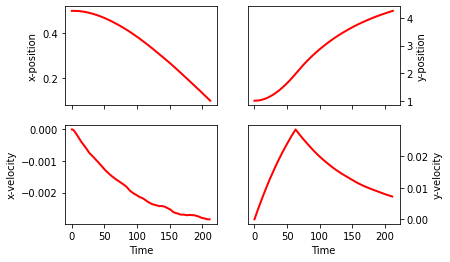

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

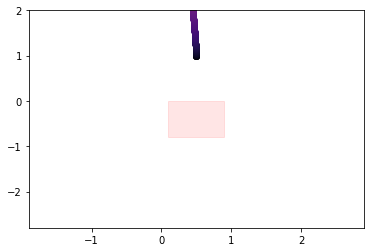

In [20]:
# Plot handling

# Score per episode and behavior at the end of training
trajectories.plot_converged(legend=False)

# Positions and speeds for trial idx
trajectories.plot_kinematics(10) 

# Trajectory for trial idx
trajectories.plot(10,legend=False)